In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Simulated Car Sales Data Generation
from faker import Faker
import random

fake = Faker()

# Define categories and variables
companies = ['Toyota', 'Ford', 'BMW', 'Honda', 'Tesla']
car_types = ['Sedan', 'SUV', 'Truck', 'Coupe', 'Hatchback']
locations = ['Mumbai', 'Delhi', 'Bangalore', 'Hyderabad', 'Chennai']

# Generate data
np.random.seed(42)
data = {
    "Company": [random.choice(companies) for _ in range(450)],
    "Car_Type": [random.choice(car_types) for _ in range(450)],
    "Units_Sold": np.random.randint(10, 500, 450),
    "Price_per_Unit": np.random.randint(500000, 3000000, 450),
    "Revenue": np.nan,  # Placeholder
    "Location": [random.choice(locations) for _ in range(450)],
    "Date_of_Sale": [fake.date_between(start_date='-2y', end_date='today') for _ in range(450)],
    "Customer_Rating": np.random.randint(1, 6, 450),
    "Marketing_Spend": np.random.randint(10000, 500000, 450),
    "Warranty_Years": np.random.randint(1, 6, 450)
}

# Create DataFrame
df = pd.DataFrame(data)


In [3]:
df.head(3)

,Company,Car_Type,Units_Sold,Price_per_Unit,Revenue,Location,Date_of_Sale,Customer_Rating,Marketing_Spend,Warranty_Years
0,Honda,Coupe,112,624123,NaN,Hyderabad,2023-05-11,2,93559,3
1,Toyota,Truck,445,1436093,NaN,Delhi,2023-03-05,4,65337,3
2,Ford,Coupe,358,1631565,NaN,Bangalore,2023-10-15,2,382760,1


In [4]:
df.tail(3)

,Company,Car_Type,Units_Sold,Price_per_Unit,Revenue,Location,Date_of_Sale,Customer_Rating,Marketing_Spend,Warranty_Years
447,Tesla,Coupe,58,2787623,NaN,Delhi,2023-09-03,1,372130,1
448,Tesla,Hatchback,26,1414032,NaN,Bangalore,2023-12-25,5,204488,5
449,Toyota,Coupe,181,2067438,NaN,Hyderabad,2023-10-11,3,173268,5


In [5]:
df.shape

(450, 10)

In [6]:
df.columns

Index(['Company', 'Car_Type', 'Units_Sold', 'Price_per_Unit', 'Revenue',
       'Location', 'Date_of_Sale', 'Customer_Rating', 'Marketing_Spend',
       'Warranty_Years'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          450 non-null    object 
 1   Car_Type         450 non-null    object 
 2   Units_Sold       450 non-null    int32  
 3   Price_per_Unit   450 non-null    int32  
 4   Revenue          0 non-null      float64
 5   Location         450 non-null    object 
 6   Date_of_Sale     450 non-null    object 
 7   Customer_Rating  450 non-null    int32  
 8   Marketing_Spend  450 non-null    int32  
 9   Warranty_Years   450 non-null    int32  
dtypes: float64(1), int32(5), object(4)
memory usage: 26.5+ KB


In [8]:
df.describe()

,Units_Sold,Price_per_Unit,Revenue,Customer_Rating,Marketing_Spend,Warranty_Years
count,450.000000,4.500000e+02,0.0,450.000000,450.000000,450.000000
mean,259.480000,1.708185e+06,NaN,2.955556,253851.933333,2.986667
std,138.949033,7.376337e+05,NaN,1.419802,140956.815341,1.431370
min,11.000000,5.004040e+05,NaN,1.000000,12050.000000,1.000000
25%,143.250000,1.056090e+06,NaN,2.000000,134174.750000,2.000000
50%,258.500000,1.675336e+06,NaN,3.000000,255643.000000,3.000000
75%,380.750000,2.366082e+06,NaN,4.000000,375300.250000,4.000000
max,499.000000,2.996081e+06,NaN,5.000000,498972.000000,5.000000


In [9]:
df.isnull().sum()

Company              0
Car_Type             0
Units_Sold           0
Price_per_Unit       0
Revenue            450
Location             0
Date_of_Sale         0
Customer_Rating      0
Marketing_Spend      0
Warranty_Years       0
dtype: int64

In [10]:
df["Revenue"].value_counts()

Series([], Name: Revenue, dtype: int64)

In [11]:
# Calculate Revenue
df["Revenue"] = df["Units_Sold"] * df["Price_per_Unit"]

In [12]:
df.isnull().sum()

Company            0
Car_Type           0
Units_Sold         0
Price_per_Unit     0
Revenue            0
Location           0
Date_of_Sale       0
Customer_Rating    0
Marketing_Spend    0
Warranty_Years     0
dtype: int64

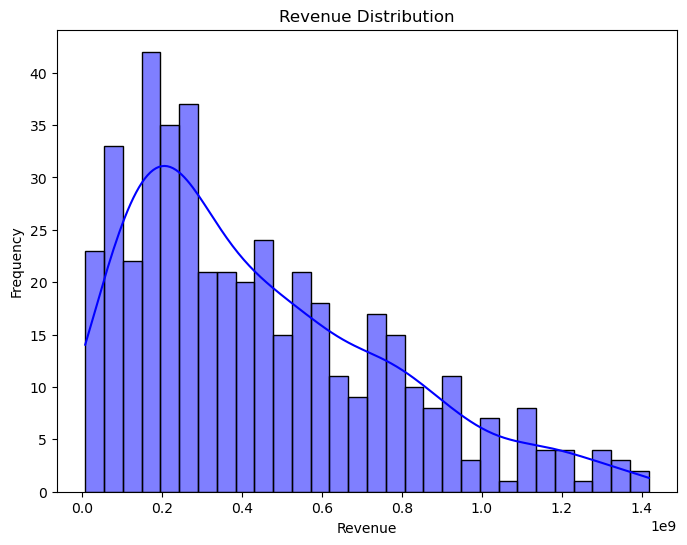

In [13]:
# Revenue Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df["Revenue"], kde=True, bins=30, color='blue')
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

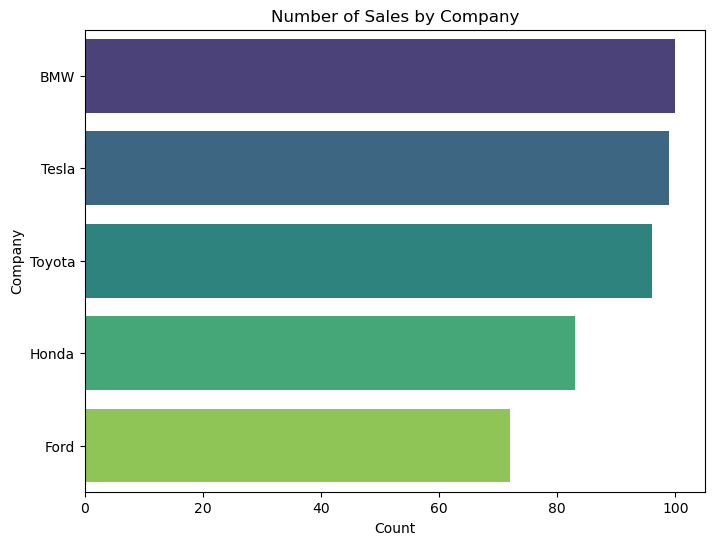

In [14]:
# Company-wise count plot
plt.figure(figsize=(8, 6))
sns.countplot(y="Company", data=df, order=df["Company"].value_counts().index, palette="viridis")
plt.title("Number of Sales by Company")
plt.xlabel("Count")
plt.ylabel("Company")
plt.show()


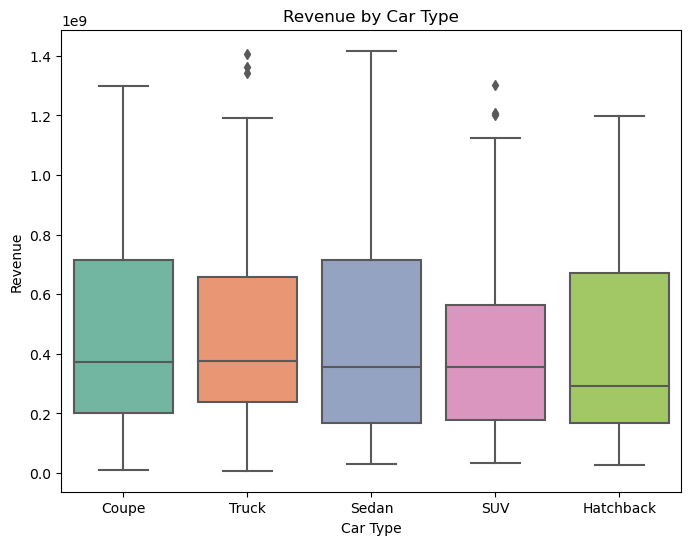

In [15]:
# Box plot: Revenue by Car Type
plt.figure(figsize=(8, 6))
sns.boxplot(x="Car_Type", y="Revenue", data=df, palette="Set2")
plt.title("Revenue by Car Type")
plt.xlabel("Car Type")
plt.ylabel("Revenue")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_1352\393665477.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


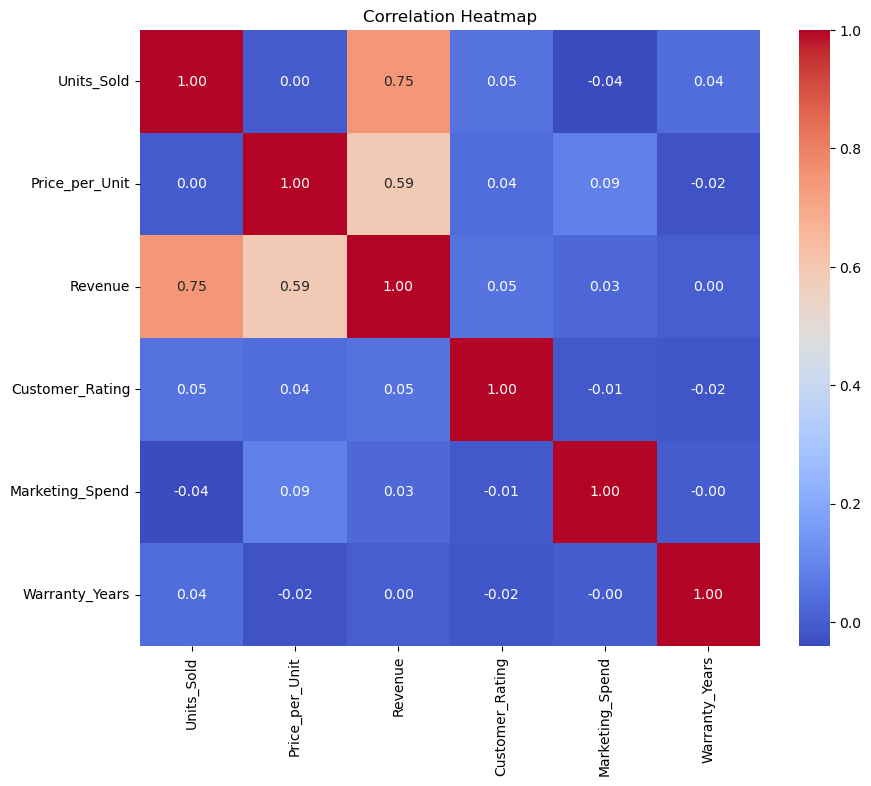

In [16]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [17]:
df["Date_of_Sale"] = pd.to_datetime(df["Date_of_Sale"])

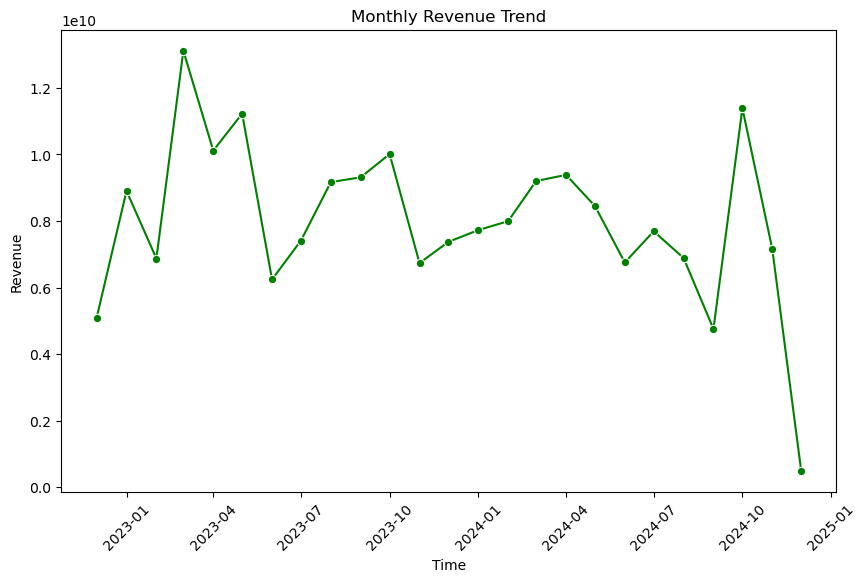

In [18]:
# Convert 'Date_of_Sale' column to datetime
df["Date_of_Sale"] = pd.to_datetime(df["Date_of_Sale"])

# Extract Year and Month
df["Year"] = df["Date_of_Sale"].dt.year
df["Month"] = df["Date_of_Sale"].dt.month

temporal_data = df.groupby(["Year", "Month"])["Revenue"].sum().reset_index()
temporal_data["Year-Month"] = pd.to_datetime(temporal_data[["Year", "Month"]].assign(Day=1))

plt.figure(figsize=(10, 6))
sns.lineplot(x="Year-Month", y="Revenue", data=temporal_data, marker="o", color="green")
plt.title("Monthly Revenue Trend")
plt.xlabel("Time")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


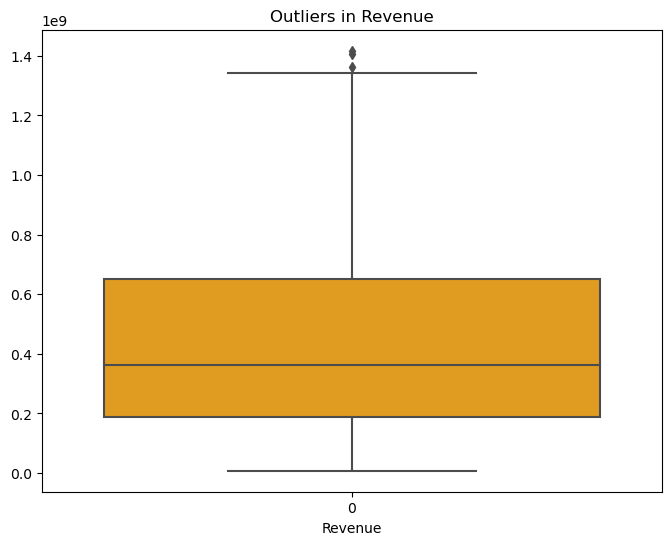

In [19]:
# Boxplot for Revenue
plt.figure(figsize=(8, 6))
sns.boxplot(df["Revenue"], color="orange")
plt.title("Outliers in Revenue")
plt.xlabel("Revenue")
plt.show()

In [20]:
# Step 10: Business Insights
print("\nBusiness Insights")
print("Highest Revenue by Company:")
print(df.groupby("Company")["Revenue"].sum().sort_values(ascending=False))

print("Average Revenue by Car Type:")
print(df.groupby("Car_Type")["Revenue"].mean())


Business Insights
Highest Revenue by Company:
Company
BMW       46442222023
Tesla     41626296531
Toyota    41492485329
Honda     37830071553
Ford      32076505251
Name: Revenue, dtype: int64
Average Revenue by Car Type:
Car_Type
Coupe        4.635120e+08
Hatchback    4.080467e+08
SUV          4.027699e+08
Sedan        4.611562e+08
Truck        4.710422e+08
Name: Revenue, dtype: float64


In [21]:
# Predictive Analysis
print("\nPredictive Analysis")
# Feature Selection
features = ["Units_Sold", "Price_per_Unit", "Customer_Rating", "Marketing_Spend", "Warranty_Years"]
X = df[features]
y = df["Revenue"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Predictive Analysis
Mean Squared Error: 577548419882661.1
R-squared Score: 0.9923675574561004


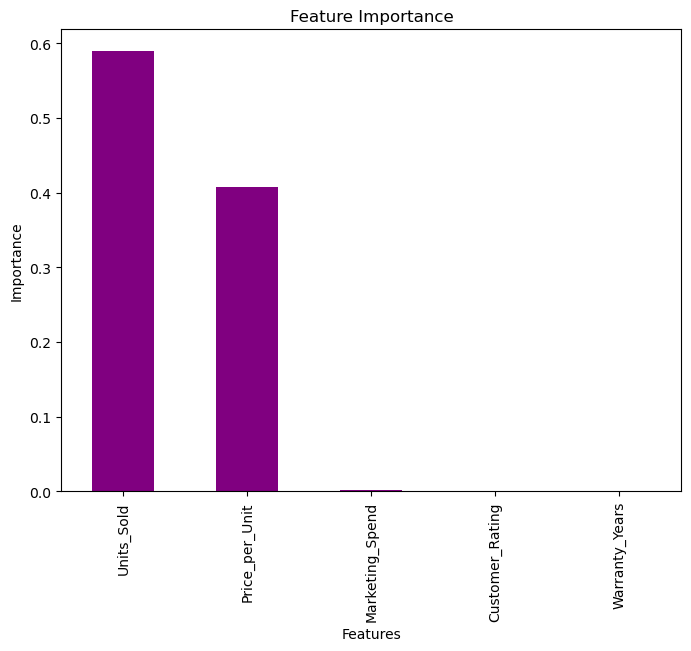

In [22]:
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
feature_importances.plot(kind="bar", color="purple")
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()
